In [1]:
import numpy as np
import pylab as plt
import math

In [2]:
#パラメーターを入れよう
#原料
W_a=500 #kg
ro_a=900 #kg/m3
D=0.8 #m
T_wall=613 #K
#頻度因子
ko=3.228*10**13 #1/s
E=186.2*10**3 #J
H_reaction=-62760 #J/mol
cpm_ave=2.51*10**3 #J/kg/K
M_a=0.385 #kg/mol
thermo_diff=532 #J/s/m2/K

#気体定数
R=8.314

In [3]:
#BR(batch reacter)高さ
height=W_a/ro_a*4/math.pi/D**2 #m
#伝熱面積
A_diff=math.pi*D*height+math.pi*D*D/4 #m2
#初濃度
C_a0=ro_a/M_a #mol/m3

print(height, A_diff, C_a0)

1.105242660360384 3.2804326023521435 2337.6623376623374


In [4]:
#微分方程式
#設計方程式
#func_mat
#熱収支
#func_heat

#初期温度と反応率
Temp=613 #K
x=0
t=0

#停止条件
x_end=0.95

#ステップ
step=0.1

#出力用の配列を用意
t_array=np.array([t])
x_array=np.array([x])
Temp_array=np.array([Temp])

#計算回数
n=0

while(x<x_end):
    func_mat=ko*math.exp(-E/R/Temp)*(1-x)
    func_heat=(T_wall-Temp)*A_diff*thermo_diff/cpm_ave/W_a\
                +H_reaction/cpm_ave/ro_a*ko*math.exp(-E/R/Temp)*C_a0*(1-x)

    t+=step
    x+=func_mat*step
    Temp=Temp+func_heat*step

    x_array=np.append(x_array,[x])
    t_array=np.append(t_array,[t])
    Temp_array=np.append(Temp_array,[Temp])

    n+=1

print(n)

19988


## 613Kの等温反応の場合と比べてみる

In [5]:
#微分方程式
#設計方程式
#func_mat

#熱収支を無視して613Kでの設計方程式を解く

#初期温度と反応率
Temp=613 #K
x=0
t=0

#停止条件
x_end=0.95

#ステップ
step=0.1

#出力用の配列を用意
t_iso_array=np.array([t])
x_iso_array=np.array([x])

#計算回数
n=0

while(x<x_end):
    func_mat=ko*math.exp(-E/R/Temp)*(1-x)

    t+=step
    x+=func_mat*step

    x_iso_array=np.append(x_iso_array,[x])
    t_iso_array=np.append(t_iso_array,[t])

    n+=1

print(n)

6831


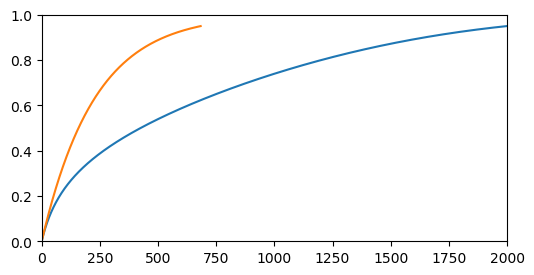

In [6]:
plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_array),0,1])
plt.plot(t_array, x_array)
plt.plot(t_iso_array, x_iso_array)
plt.show()

613Kでの等温反応では600s程度で反応が終了することが分かる。  
反応の吸熱を加味しないと計算結果を小さく見積もることになる。

---
# 513Kで同じことをやってみる

In [7]:
T_wall=513 #K

In [8]:
#微分方程式
#設計方程式
#func_mat
#熱収支
#func_heat

#初期温度と反応率
Temp=513 #K
x=0
t=0

#停止条件
x_end=0.95

#ステップ
step=100

#出力用の配列を用意
t_513_array=np.array([t])
x_513_array=np.array([x])
Temp_513_array=np.array([Temp])

#計算回数
n=0

while(x<x_end):
    func_mat=ko*math.exp(-E/R/Temp)*(1-x)
    func_heat=(T_wall-Temp)*A_diff*thermo_diff/cpm_ave/W_a\
                +H_reaction/cpm_ave/ro_a*ko*math.exp(-E/R/Temp)*C_a0*(1-x)

    t+=step
    x+=func_mat*step
    Temp=Temp+func_heat*step

    x_513_array=np.append(x_513_array,[x])
    t_513_array=np.append(t_513_array,[t])
    Temp_513_array=np.append(Temp_513_array,[Temp])

    n+=1

print(n)

8499


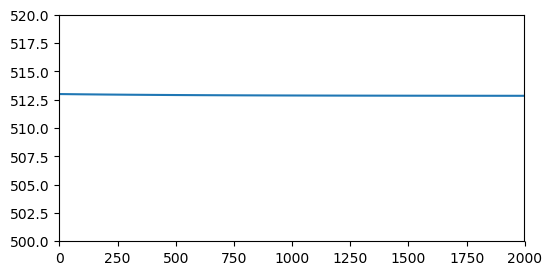

In [9]:
plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_array),500,520])
plt.plot(t_513_array, Temp_513_array)
plt.show()

温度変化を見るとほとんど一定の温度を取っていることが分かる

In [10]:
#微分方程式
#設計方程式
#func_mat

#熱収支を無視して613Kでの設計方程式を解く

#初期温度と反応率
Temp=513 #K
x=0
t=0

#停止条件
x_end=0.95

#ステップ
step=100

#出力用の配列を用意
t_513_iso_array=np.array([t])
x_513_iso_array=np.array([x])

#計算回数
n=0

while(x<x_end):
    func_mat=ko*math.exp(-E/R/Temp)*(1-x)

    t+=step
    x+=func_mat*step

    x_513_iso_array=np.append(x_513_iso_array,[x])
    t_513_iso_array=np.append(t_513_iso_array,[t])

    n+=1

print(n)

8461


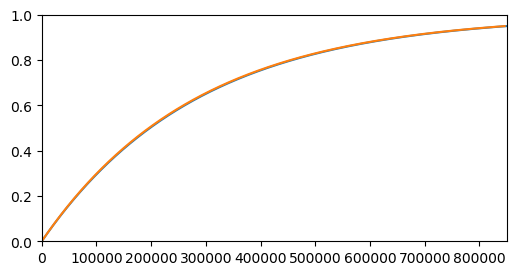

In [13]:
plt.figure(figsize=(6,3),dpi=100,facecolor='w', edgecolor='k')
plt.axis([0,max(t_513_array),0,1])
plt.plot(t_513_array, x_513_array)
plt.plot(t_513_iso_array, x_513_iso_array)
plt.show()

反応熱に対して伝熱速度が大きい場合、温度変化が小さくなるため等温反応とみなせる。反応速度は温度に対して敏感に変化する